In [3]:
import pandas as pd
import string

In [2]:
merged_data = pd.read_csv('merged_data_updated.csv')

In [3]:
merged_data.shape

(6111, 4740)

In [4]:
punctuations = string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
merged_data['amenities'] = merged_data['amenities'].astype(str)

In [6]:
merged_data.amenities = merged_data.amenities.str.replace(r"{[|]}|\"","").str.split(",")

C:\Users\amogh\AppData\Local\Temp\ipykernel_18156\983844100.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_data.amenities = merged_data.amenities.str.replace(r"{[|]}|\"","").str.split(",")


In [7]:
merged_data.amenities

0       [[Oven,  Hot water kettle,  Fire extinguisher,...
1       [[Oven,  Fire extinguisher,  Dryer,  Hangers, ...
2       [[Oven,  Fire extinguisher,  Hangers,  Carbon ...
3       [[Oven,  Hot water kettle,  Fire extinguisher,...
4       [[Fire extinguisher,  Dryer,  Hangers,  Indoor...
                              ...                        
6106    [[TV,  Lock on bedroom door,  Wifi,  Hair drye...
6107    [[Hot water kettle,  Fire extinguisher,  Lockb...
6108    [[Hot water kettle,  Fire extinguisher,  Carbo...
6109    [[Oven,  Hot water kettle,  Dryer,  Outdoor fu...
6110    [[Essentials,  Refrigerator,  Bed linens,  Han...
Name: amenities, Length: 6111, dtype: object

In [8]:
amenities_df = pd.DataFrame([amn for amn in merged_data.amenities.apply(lambda item: dict(map(lambda amn: (amn,1),item))).values]).fillna(0)

In [9]:
amenities_df.columns = amenities_df.columns.str.replace('[', '')
amenities_df.columns = amenities_df.columns.str.replace(']', '')
amenities_df.columns = amenities_df.columns.str.replace('\\', '__')
amenities_df.columns = amenities_df.columns.str.replace('__u', '')

C:\Users\amogh\AppData\Local\Temp\ipykernel_18156\2911603259.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amenities_df.columns = amenities_df.columns.str.replace('[', '')
C:\Users\amogh\AppData\Local\Temp\ipykernel_18156\2911603259.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amenities_df.columns = amenities_df.columns.str.replace(']', '')
C:\Users\amogh\AppData\Local\Temp\ipykernel_18156\2911603259.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amenities_df.columns = amenities_df.columns.str.replace('

In [10]:
amenities_df

,Oven,Hot water kettle,Fire extinguisher,Outdoor furniture,Dining table,Hangers,Indoor fireplace,Long term stays allowed,Carbon monoxide alarm,Cooking basics,...,Faith for Nature conditioner,Fast wifi 2013 223 Mbps,Pour-over coffee,DVD player,HDTV with Netflix,Fast wifi 2013 82 Mbps,36__ HDTV with Netflix,JBL Bluetooth sound system,Palmolive body soap,Wifi 2013 17 Mbps
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6107,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6108,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6109,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
amenities_df = amenities_df.loc[:,~amenities_df.columns.duplicated()].copy()
amenities_df

,Oven,Hot water kettle,Fire extinguisher,Outdoor furniture,Dining table,Hangers,Indoor fireplace,Long term stays allowed,Carbon monoxide alarm,Cooking basics,...,Elvive conditioner,Fast wifi 2013 320 Mbps,Faith for Nature conditioner,Fast wifi 2013 223 Mbps,HDTV with Netflix,Fast wifi 2013 82 Mbps,36__ HDTV with Netflix,JBL Bluetooth sound system,Palmolive body soap,Wifi 2013 17 Mbps
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6107,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6108,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6109,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
amenities_df

,Oven,Hot water kettle,Fire extinguisher,Outdoor furniture,Dining table,Hangers,Indoor fireplace,Long term stays allowed,Carbon monoxide alarm,Cooking basics,...,Elvive conditioner,Fast wifi 2013 320 Mbps,Faith for Nature conditioner,Fast wifi 2013 223 Mbps,HDTV with Netflix,Fast wifi 2013 82 Mbps,36__ HDTV with Netflix,JBL Bluetooth sound system,Palmolive body soap,Wifi 2013 17 Mbps
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6107,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6108,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6109,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
merged_data = merged_data.join(amenities_df)

In [14]:
merged_data = merged_data.drop(columns=["amenities"])

In [15]:
merged_data.to_csv('merged_data_amn_updated.csv', index= False)

In [4]:
merged_data = pd.read_csv("merged_data_amn_updated.csv")
merged_data

,name,neighborhood_overview,picture_url,host_name,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,...,Elvive conditioner,Fast wifi 2013 320 Mbps,Faith for Nature conditioner,Fast wifi 2013 223 Mbps,HDTV with Netflix,Fast wifi 2013 82 Mbps,36__ HDTV with Netflix,JBL Bluetooth sound system,Palmolive body soap,Wifi 2013 17 Mbps
0,1,1,1,1,100,99,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,100,99,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,100,95,0,1,1,3,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,92,87,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,100,91,0,1,1,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6106,1,1,1,1,100,100,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6107,1,1,1,1,98,100,0,1,1,24,...,0,0,0,0,0,0,0,0,0,0
6108,1,0,1,1,100,100,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6109,1,1,1,1,100,100,0,1,1,2,...,0,0,0,0,0,0,0,0,0,1


In [5]:
host_columns_vis = ["host_response_rate","host_acceptance_rate", "host_total_listings_count", "calculated_host_listings_count"]
listing_column_vis = ["accommodates","bedrooms", "beds", "price", "minimum_nights", "maximum_nights", "availability_30", "availability_60"]
review_column_vis = ["number_of_reviews", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]
review_comment_col_vis = ["comment_neg", "comment_neu", "comment_pos"]
host_vis = merged_data[host_columns_vis]
listing_vis = merged_data[listing_column_vis]
review_vis = merged_data[review_column_vis]
review_comment_vis = merged_data[review_comment_col_vis]

In [6]:
from matplotlib import pyplot as plt

C:\Users\amogh\AppData\Local\Temp\ipykernel_20380\1409304430.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  host_vis.hist(ax=ax)


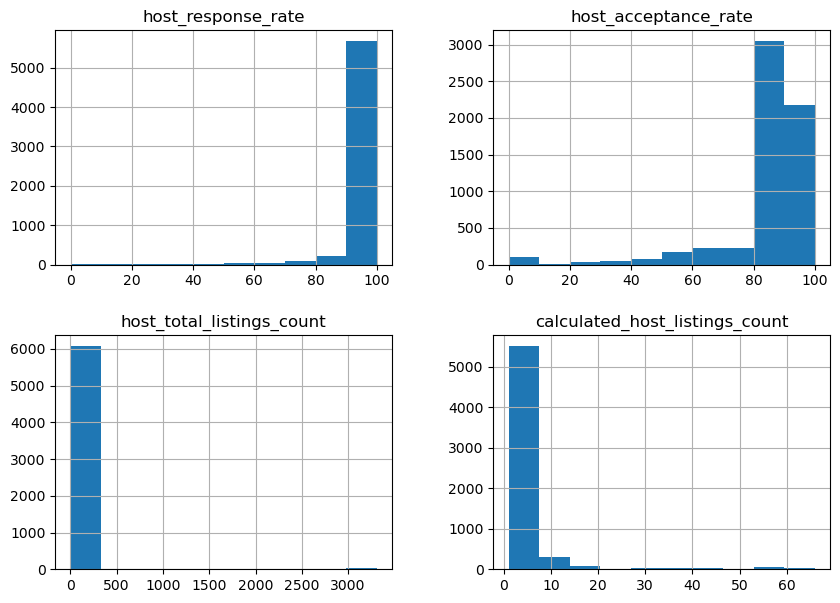

In [7]:
fig = plt.figure(figsize =(10, 7))
ax = fig.gca()
host_vis.hist(ax=ax)
 
# Show plot
plt.show()

C:\Users\amogh\AppData\Local\Temp\ipykernel_20380\1484763357.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  listing_vis.hist(ax=ax)


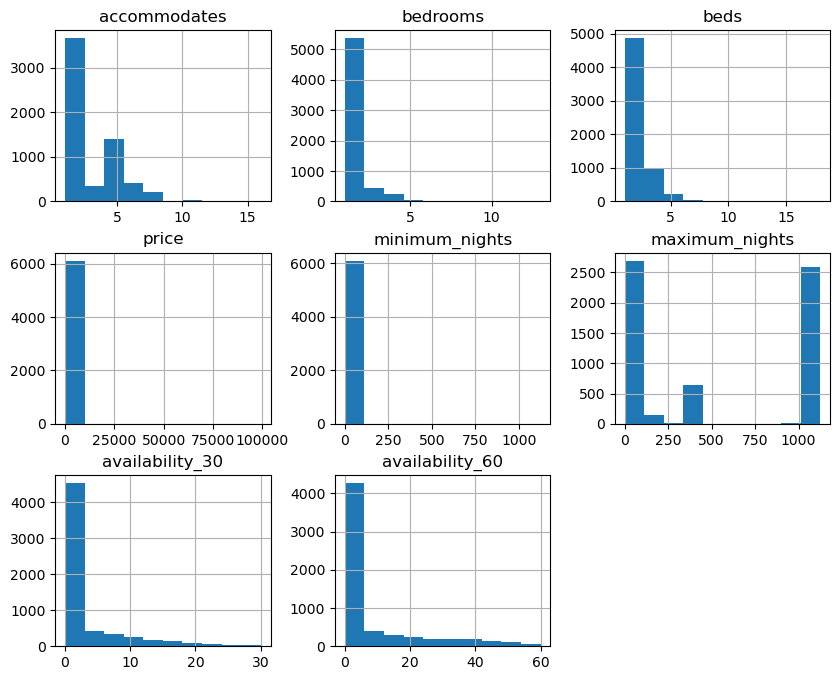

In [8]:
fig = plt.figure(figsize =(10, 8))
ax = fig.gca()
listing_vis.hist(ax=ax)
 
# Show plot
plt.show()

C:\Users\amogh\AppData\Local\Temp\ipykernel_20380\1353951827.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  review_vis.hist(ax=ax)


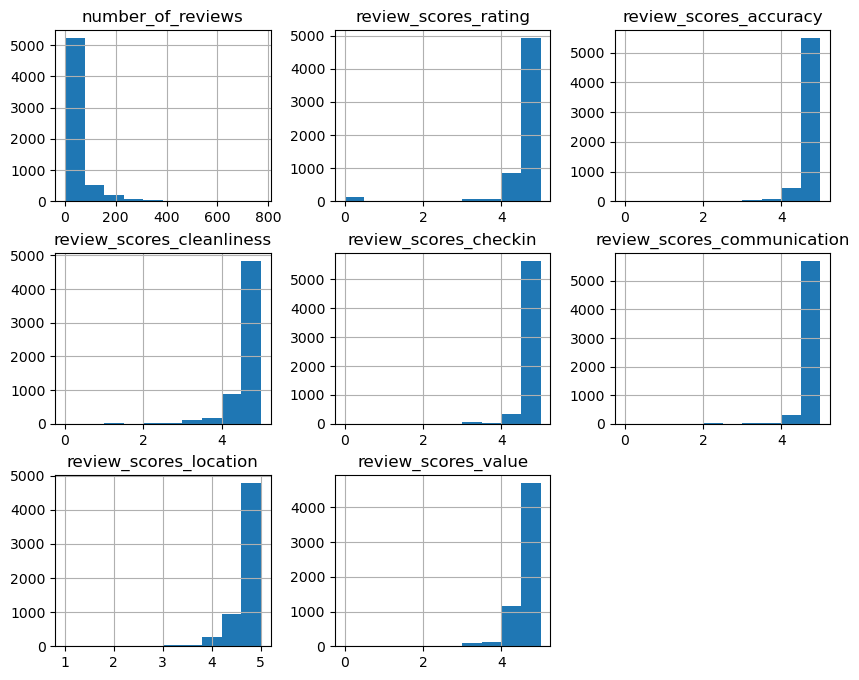

In [9]:
fig = plt.figure(figsize =(10, 8))
ax = fig.gca()
review_vis.hist(ax=ax)
 
# Show plot
plt.show()

C:\Users\amogh\AppData\Local\Temp\ipykernel_20380\609625273.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  review_comment_vis.hist(ax=ax)


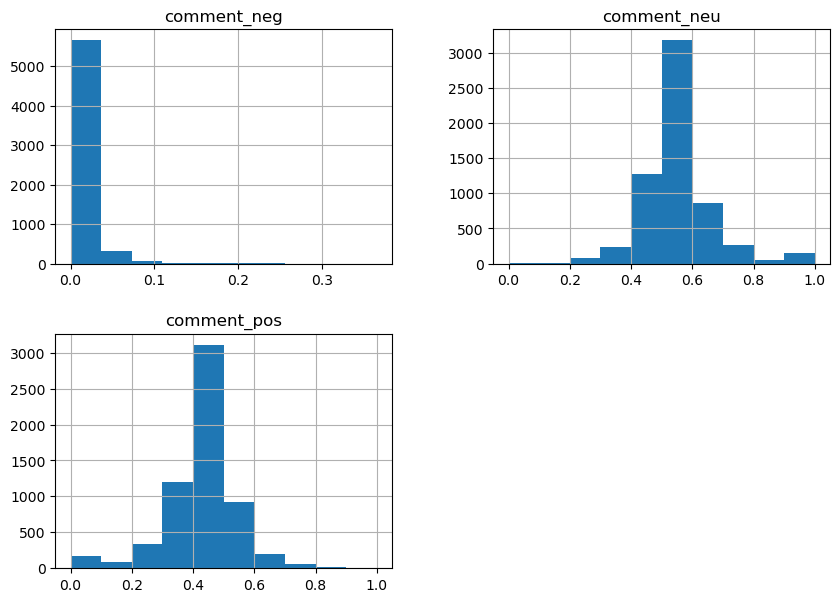

In [10]:
fig = plt.figure(figsize =(10, 7))
ax = fig.gca()
review_comment_vis.hist(ax=ax)
 
# Show plot
plt.show()